<a href="https://colab.research.google.com/github/vishnuraghavendar2019/Exploratory-data-analysis-DA-21BDS0145/blob/main/EDA%20%20DA%2021BDS0145.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#Import necessary library
!pip install scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

In [36]:
#reading csv file
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv'
data = pd.read_csv(url)
data.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999


In [2]:
#column names
data.columns

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')

In [3]:
#datatypes
data.dtypes

,0
Symbol,object
Security,object
GICS Sector,object
GICS Sub-Industry,object
Headquarters Location,object
Date added,object
CIK,int64
Founded,object


In [4]:
#rows and column
data.shape

(503, 8)

In [5]:
#mean of CIK
data_mean = np.mean(data["CIK"])
data_mean

821753.648111332

In [6]:
data.describe()

,CIK
count,5.030000e+02
mean,8.217536e+05
std,5.665200e+05
min,1.800000e+03
25%,1.005050e+05
50%,9.000750e+05
75%,1.175188e+06
max,2.005951e+06


In [ ]:
#Descriptive statistics
mean = data["CIK"].mean()
median =data["CIK"].median()
mode = data["CIK"].mode()
print(mean , median, mode)

821753.648111332 900075.0 0    1564708
1    1652044
2    1754301
Name: CIK, dtype: int64


Data Transformation

In [8]:
# Checking for duplicates
duplicates = data.duplicated().sum()

# Removing duplicates
data_deduped = data.drop_duplicates()

# Checking for missing values
missing_values = data_deduped.isnull().sum()

# Dropping rows with missing values
data_dropped_na = data_deduped.dropna()

# Filling missing values (forward fill)
data_filled_na = data_deduped.fillna(method='ffill')

# Display results
{
    'Duplicates Found': duplicates,
    'Missing Values (before filling)': missing_values,
    'Data after Dropping NA': data_dropped_na.isnull().sum(),
    'Data after Filling NA': data_filled_na.isnull().sum()
}


<ipython-input-8-f0377c6ef0c0>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_na = data_deduped.fillna(method='ffill')


{'Duplicates Found': 0,
 'Missing Values (before filling)': Symbol                   0
 Security                 0
 GICS Sector              0
 GICS Sub-Industry        0
 Headquarters Location    0
 Date added               0
 CIK                      0
 Founded                  0
 dtype: int64,
 'Data after Dropping NA': Symbol                   0
 Security                 0
 GICS Sector              0
 GICS Sub-Industry        0
 Headquarters Location    0
 Date added               0
 CIK                      0
 Founded                  0
 dtype: int64,
 'Data after Filling NA': Symbol                   0
 Security                 0
 GICS Sector              0
 GICS Sub-Industry        0
 Headquarters Location    0
 Date added               0
 CIK                      0
 Founded                  0
 dtype: int64}



*   No duplicates were found
*   No missing values



**DISCRETIZAION AND BINNING**

In [9]:
# Converting 'Founded' to numeric
data['Founded'] = pd.to_numeric(data['Founded'], errors='coerce')

# Defining bins and labels for discretization
bins = [1800, 1900, 1950, 2000, 2025]
labels = ['Very Old', 'Old', 'Moderate', 'New']

# Adding a new column for the binned categories
data['Founded_Binned'] = pd.cut(data['Founded'], bins=bins, labels=labels, right=False)

# Displaying a sample
data[['Founded', 'Founded_Binned']].head(10)


,Founded,Founded_Binned
0,1902.0,Old
1,1916.0,Old
2,1888.0,Very Old
3,NaN,NaN
4,1989.0,Moderate
5,1982.0,Moderate
6,1969.0,Moderate
7,1981.0,Moderate
8,1955.0,Moderate
9,1999.0,Moderate


**OUTLIER DETECTION**

In [10]:
# Outlier detection using the IQR
Q1 = data['Founded'].quantile(0.25)
Q3 = data['Founded'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data[(data['Founded'] < lower_bound) | (data['Founded'] > upper_bound)]

# Displaying the outliers
outliers[['Founded']]


,Founded
58,1784.0
119,1806.0
426,1792.0


**UNIVARIATE ANALYSIS**

MEASURE OF CENTRAL TENDENCY AND DISPERSION

In [11]:
# Calculating central tendency
mean_founded = data['Founded'].mean()
median_founded = data['Founded'].median()
mode_founded = data['Founded'].mode()[0]

# Calculating dispersion
std_dev_founded = data['Founded'].std()
iqr_founded = data['Founded'].quantile(0.75) - data['Founded'].quantile(0.25)

# Compiling the results
{
    'Mean': mean_founded,
    'Median': median_founded,
    'Mode': mode_founded,
    'Standard Deviation': std_dev_founded,
    'Interquartile Range (IQR)': iqr_founded
}


{'Mean': 1952.0976138828632,
 'Median': 1968.0,
 'Mode': 1993.0,
 'Standard Deviation': 48.3900054218725,
 'Interquartile Range (IQR)': 73.0}

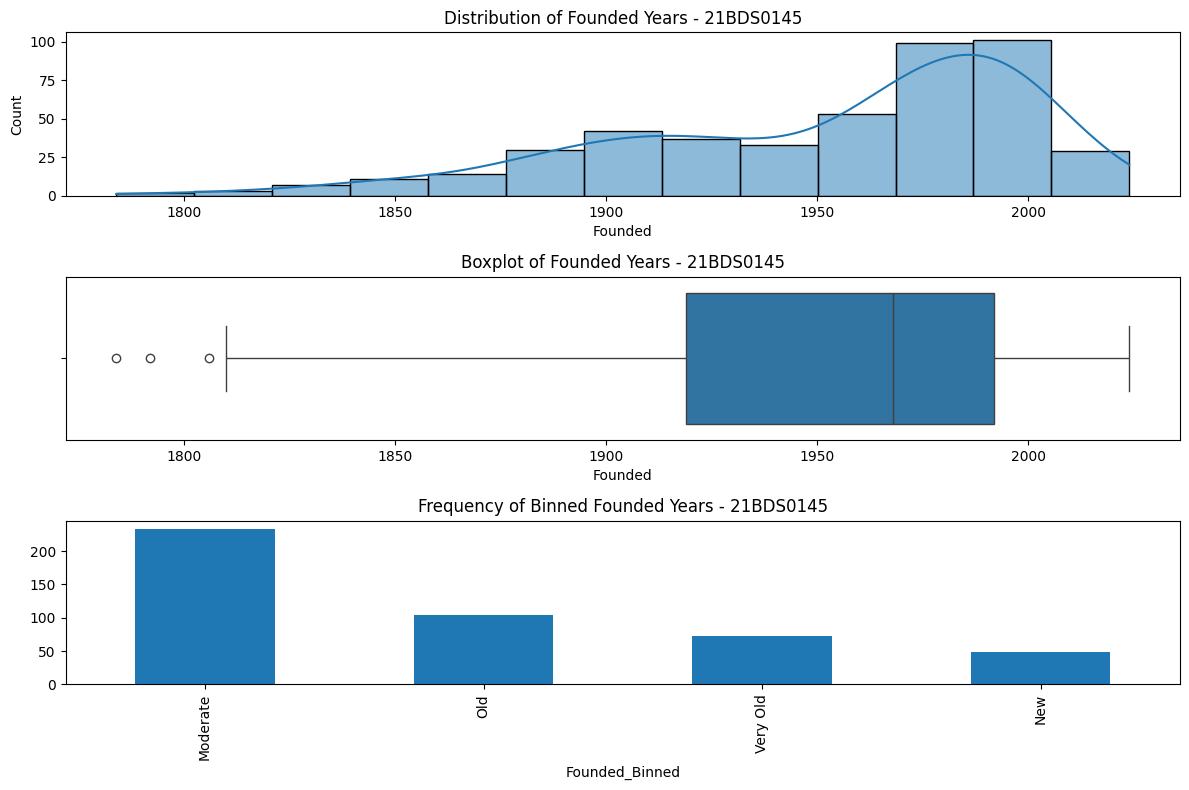

In [13]:
plt.figure(figsize=(12, 8))

# Distribution Plot
plt.subplot(3, 1, 1)
sns.histplot(data['Founded'].dropna(), kde=True)
plt.title('Distribution of Founded Years - 21BDS0145')

# Box Plot
plt.subplot(3, 1, 2)
sns.boxplot(x=data['Founded'].dropna())
plt.title('Boxplot of Founded Years - 21BDS0145')

# Bar Plot of the Binned Founded Years
plt.subplot(3, 1, 3)
data['Founded_Binned'].value_counts().plot(kind='bar')
plt.title('Frequency of Binned Founded Years - 21BDS0145')

plt.tight_layout()
plt.show()


BIVARIATE ANALYSIS

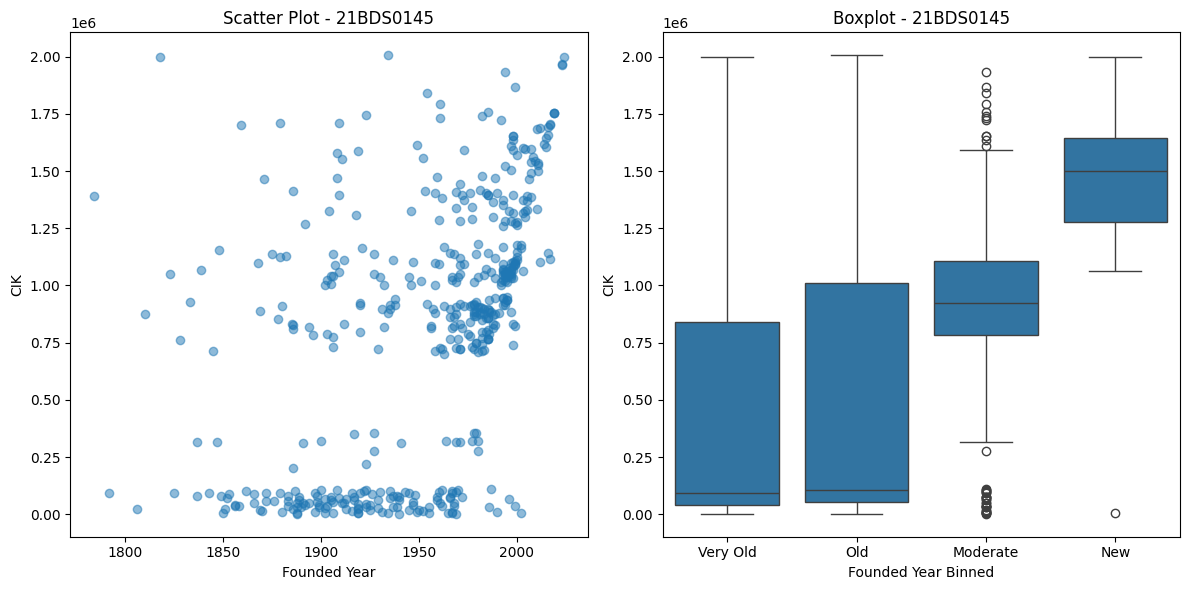

In [14]:
plt.figure(figsize=(12, 6))

# Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(data['Founded'], data['CIK'], alpha=0.5)
plt.xlabel('Founded Year')
plt.ylabel('CIK')
plt.title('Scatter Plot - 21BDS0145')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Founded_Binned', y='CIK', data=data)
plt.xlabel('Founded Year Binned')
plt.ylabel('CIK')
plt.title('Boxplot - 21BDS0145')

plt.tight_layout()
plt.show()


**MULTIVARIATE ANALYSIS**



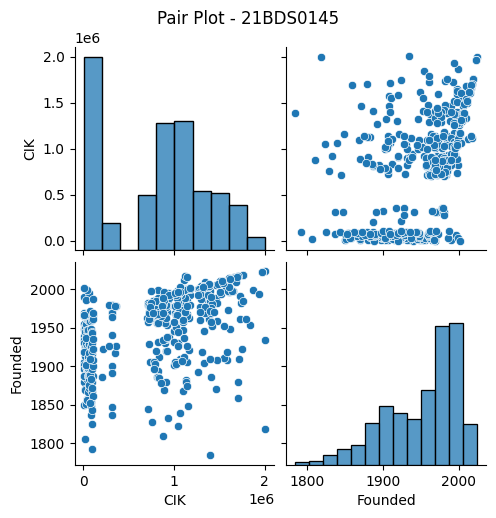

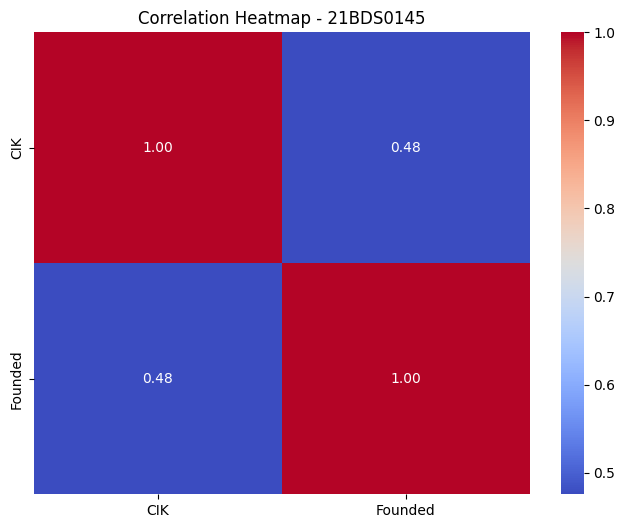

In [16]:
# Scatter Matrix
sns.pairplot(data[['CIK', 'Founded']])
plt.suptitle('Pair Plot - 21BDS0145', y=1.02)
plt.show()

# Computing the correlation matrix
correlation_matrix = data[['CIK', 'Founded']].corr()
correlation_matrix

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap - 21BDS0145')
plt.show()

**SKEWNESS AND KURTOSIS**

In [20]:
# Calculating skewness and kurtosis
skewness_founded = data['Founded'].skew()
kurtosis_founded = data['Founded'].kurt()

# Displaying skewness and kurtosis
{
    'Skewness': skewness_founded,
    'Kurtosis': kurtosis_founded
}


{'Skewness': -0.8902231666017755, 'Kurtosis': 0.10863134513143535}

**FREQUENCY DISTRIBUTION ANALYSIS**

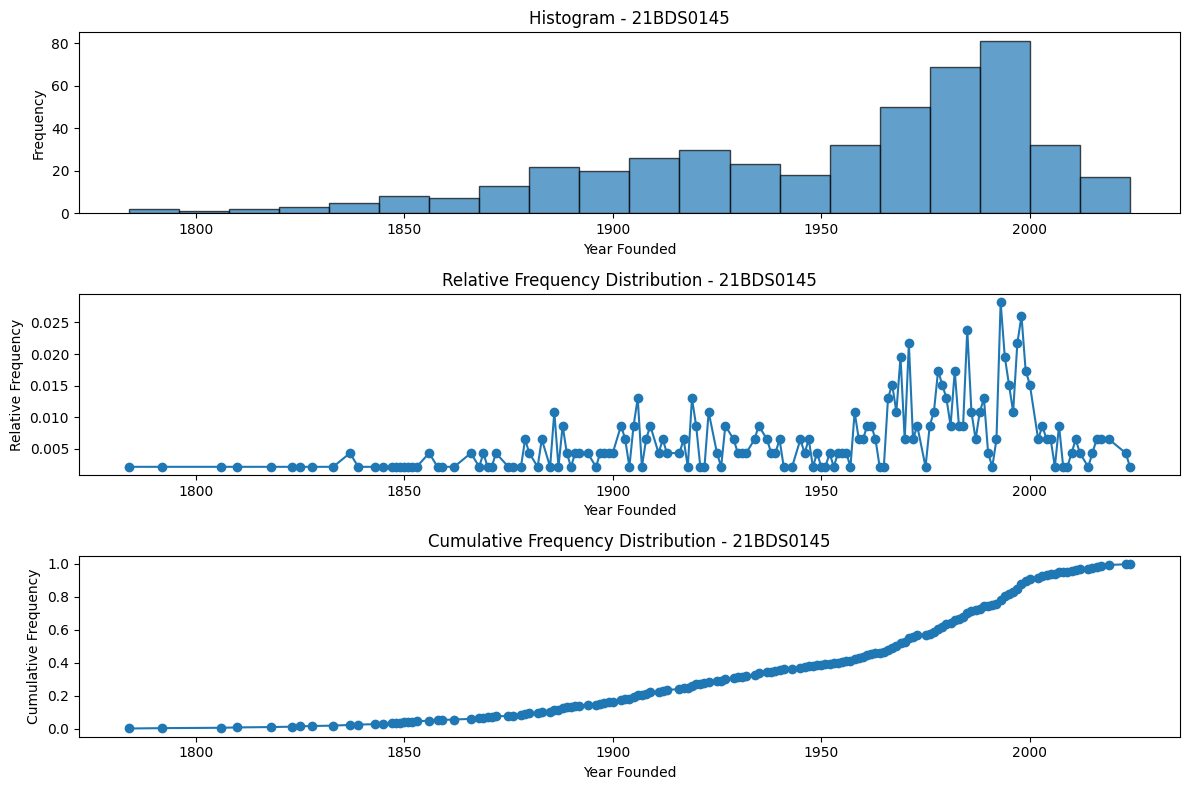

In [21]:
# Frequency distribution
founded_counts = data['Founded'].dropna().value_counts().sort_index()

# Relative frequency distribution
relative_frequency = founded_counts / founded_counts.sum()

# Cumulative frequency distribution
cumulative_frequency = founded_counts.cumsum() / founded_counts.sum()

# Plotting frequency distributions
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(3, 1, 1)
plt.hist(data['Founded'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram - 21BDS0145')
plt.xlabel('Year Founded')
plt.ylabel('Frequency')

# Relative Frequency Plot
plt.subplot(3, 1, 2)
plt.plot(relative_frequency.index, relative_frequency.values, marker='o')
plt.title('Relative Frequency Distribution - 21BDS0145')
plt.xlabel('Year Founded')
plt.ylabel('Relative Frequency')

# Cumulative Frequency Plot
plt.subplot(3, 1, 3)
plt.plot(cumulative_frequency.index, cumulative_frequency.values, marker='o')
plt.title('Cumulative Frequency Distribution - 21BDS0145')
plt.xlabel('Year Founded')
plt.ylabel('Cumulative Frequency')

plt.tight_layout()
plt.show()


**2-D analysis of two categorical variables**

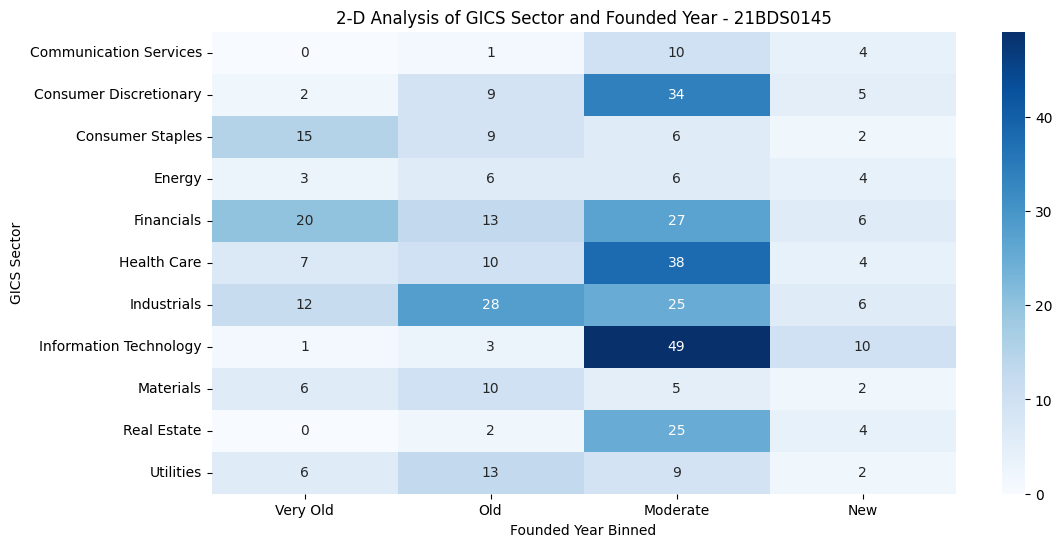

In [24]:
if "GICS Sector" in data.columns:
    data = data.rename(columns={"GICS Sector": "GICS_Sector"})
elif "GICS_sector" in data.columns:
    data = data.rename(columns={"GICS_sector": "GICS_Sector"})

sector_founded_crosstab = pd.crosstab(data['GICS_Sector'], data['Founded_Binned'])

# Plotting the crosstab as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sector_founded_crosstab, annot=True, cmap='Blues', fmt="d")
plt.title('2-D Analysis of GICS Sector and Founded Year - 21BDS0145')
plt.xlabel('Founded Year Binned')
plt.ylabel('GICS Sector')
plt.show()

**2-D analysis of two quantitative variables**

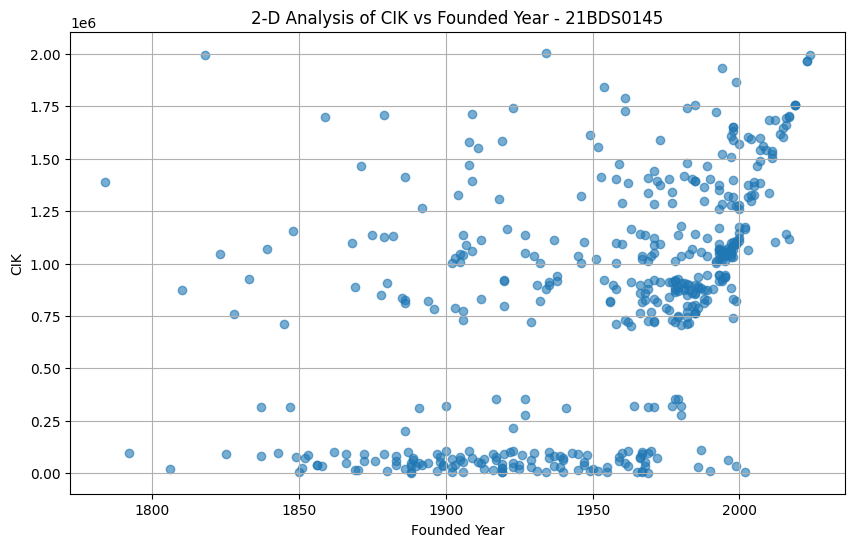

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Founded'], data['CIK'], alpha=0.6)
plt.title('2-D Analysis of CIK vs Founded Year - 21BDS0145')
plt.xlabel('Founded Year')
plt.ylabel('CIK')
plt.grid(True)
plt.show()


**2-D analysis of a quantitative variable and a categorical variable**

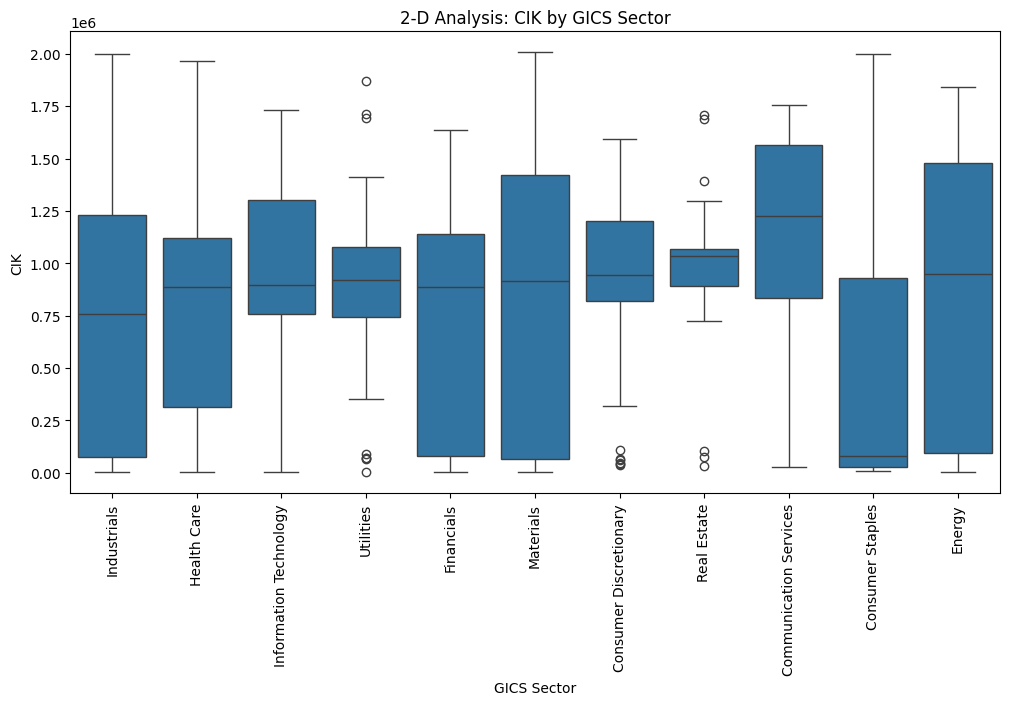

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='GICS_Sector', y='CIK', data=data)
plt.title('2-D Analysis: CIK by GICS Sector')
plt.xticks(rotation=90)
plt.xlabel('GICS Sector')
plt.ylabel('CIK')
plt.show()

**3-D analysis of a quantitative variable and two categorical variables**

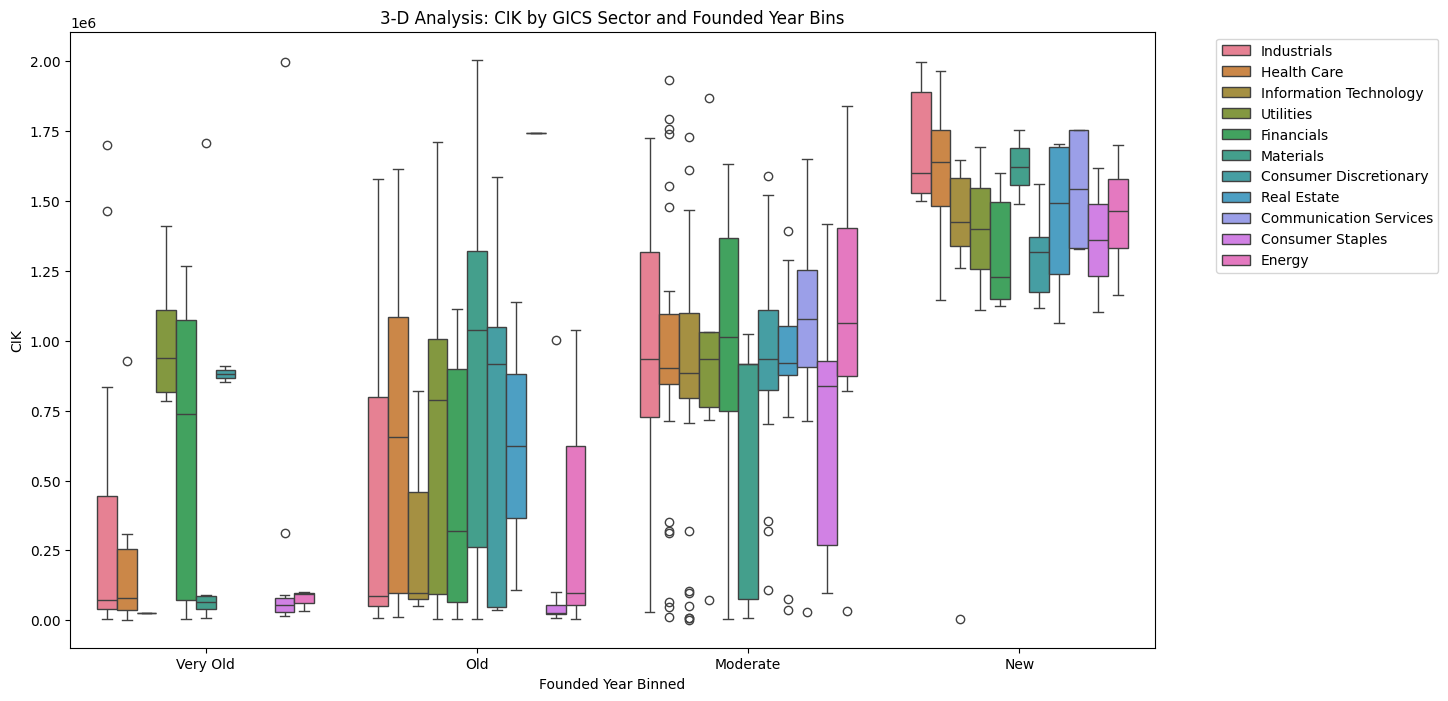

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Founded_Binned', y='CIK', hue='GICS_Sector', data=data)
plt.title('3-D Analysis: CIK by GICS Sector and Founded Year Bins')
plt.xlabel('Founded Year Binned')
plt.ylabel('CIK')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**3-D analysis of a categorical variable and two quantitative variables**

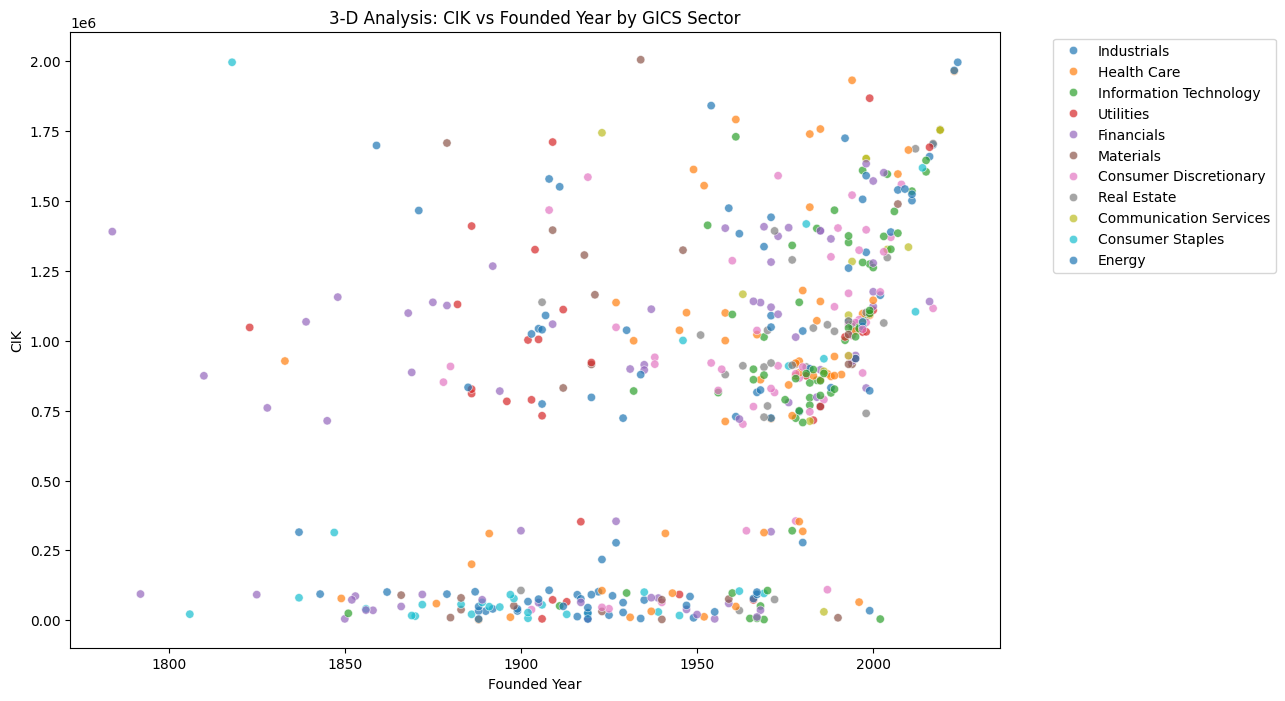

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Founded', y='CIK', hue='GICS_Sector', data=data, palette="tab10", alpha=0.7)
plt.title('3-D Analysis: CIK vs Founded Year by GICS Sector')
plt.xlabel('Founded Year')
plt.ylabel('CIK')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**K-means Clustering**

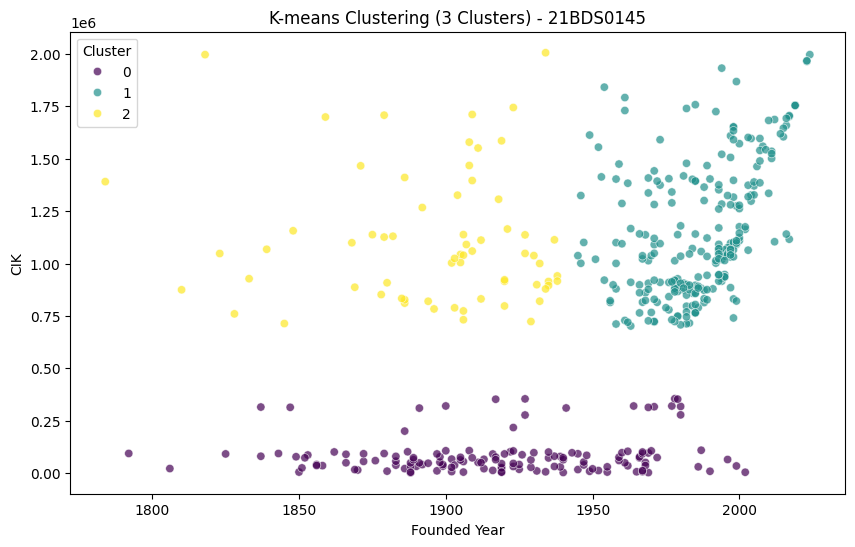

In [32]:
# Selecting numerical columns and normalizing them
numerical_data = data[['Founded', 'CIK']].dropna()
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Fitting K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_data)

# Adding cluster labels to the dataset for visualization
numerical_data_with_labels = numerical_data.copy()
numerical_data_with_labels['Cluster'] = kmeans_labels

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_data_with_labels['Founded'], y=numerical_data_with_labels['CIK'],
                hue=numerical_data_with_labels['Cluster'], palette='viridis', marker="o", alpha=0.7)
plt.title('K-means Clustering (3 Clusters) - 21BDS0145')
plt.xlabel('Founded Year')
plt.ylabel('CIK')
plt.legend(title='Cluster')
plt.show()


**Using elbow method**

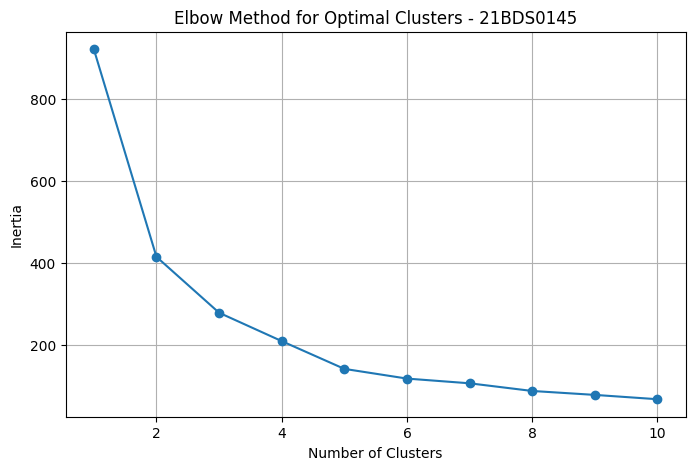

In [34]:
# Using the elbow method to find the optimal number of clusterS
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Clusters - 21BDS0145')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


**Hierarchical clustering**

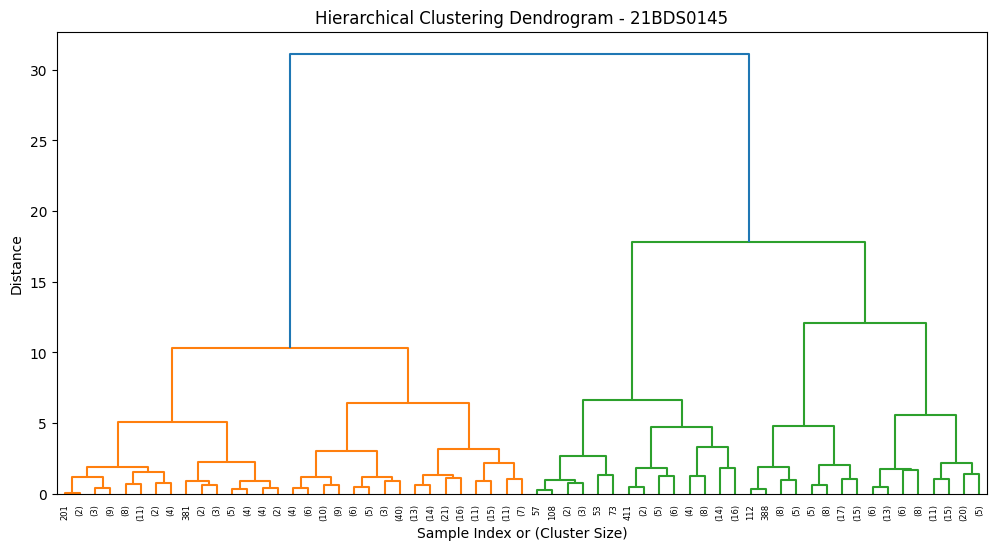

In [40]:
# Performing hierarchical clustering
linked = linkage(normalized_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram - 21BDS0145')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


**Principal Component Analysis (PCA)**

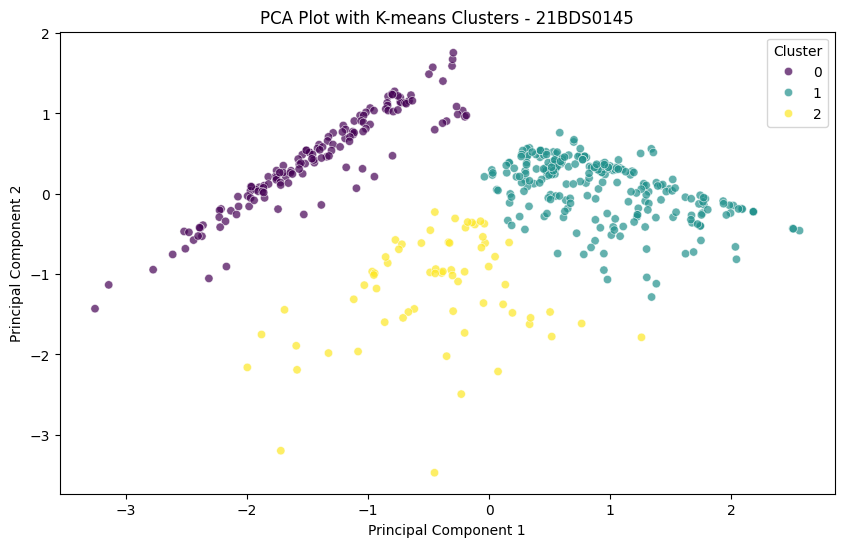

In [42]:
# Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data)
pca_data = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Scatter plot of the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=kmeans_labels, palette='viridis', data=pca_data, marker="o", alpha=0.7)
plt.title('PCA Plot with K-means Clusters - 21BDS0145')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
